In [58]:
import matplotlib.pyplot as plt
import plt_utils
from pathlib import Path
import numpy as np
import json

In [ ]:
hyperparameters_wikitext2 = {
    "retriever.s_context": 256,
    "generator.s_sequence": 1024,
    "evaluator.s_prefix": 128,
}

In [ ]:
result_paths_wikitext2 = {
    'n_docs=0': {
        'W/O Retrieval': 'outputs/LanguageModeling-20250321195433'
    },
    'n_docs=16': {
        'DRAGON': 'outputs/LanguageModeling-20250321203200',
        'DRCG': 'outputs/LanguageModeling-20250321203930',
        'CRCG/Cloud': 'outputs/LanguageModeling-20250321211215',
        'CRCG/Device': 'outputs/LanguageModeling-20250321211607',
    },
    'n_docs=14': {
        'DRAGON': 'outputs/LanguageModeling-20250321204439',
        'DRCG': 'outputs/LanguageModeling-20250321205847',
        'CRCG/Cloud': 'outputs/LanguageModeling-20250321211833',
        'CRCG/Device': 'outputs/LanguageModeling-20250321211714',
    },
    'n_docs=12': {
        'DRAGON': 'outputs/LanguageModeling-20250321214241',
        'DRCG': 'outputs/LanguageModeling-20250321215744',
        'CRCG/Cloud': 'outputs/LanguageModeling-20250321220322',
        'CRCG/Device': 'outputs/LanguageModeling-20250321220633',
    },
    'n_docs=10': {
        'DRAGON': 'outputs/LanguageModeling-20250321213639',
        'DRCG': 'outputs/LanguageModeling-20250321215658',
        'CRCG/Cloud': 'outputs/LanguageModeling-20250321220238',
        'CRCG/Device': 'outputs/LanguageModeling-20250321220550',
    },
    'n_docs=8': {
        'DRAGON': 'outputs/LanguageModeling-20250321212338',
        'DRCG': 'outputs/LanguageModeling-20250321212145',
        'CRCG/Cloud': 'outputs/LanguageModeling-20250321211933',
        'CRCG/Device': 'outputs/LanguageModeling-20250321212024',
    },
    'n_docs=6': {
        'DRAGON': 'outputs/LanguageModeling-20250321212940',
        'DRCG': 'outputs/LanguageModeling-20250321215615',
        'CRCG/Cloud': 'outputs/LanguageModeling-20250321220155',
        'CRCG/Device': 'outputs/LanguageModeling-20250321220510',
    },
    'n_docs=4': {
        'DRAGON': 'outputs/LanguageModeling-20250321205347',
        'DRCG': 'outputs/LanguageModeling-20250321205740',
        'CRCG/Cloud': 'outputs/LanguageModeling-20250321210023',
        'CRCG/Device': 'outputs/LanguageModeling-20250321210436',
    },
    'n_docs=2': {
        'DRAGON': 'outputs/LanguageModeling-20250321205129',
        'DRCG': 'outputs/LanguageModeling-20250321205622',
        'CRCG/Cloud': 'outputs/LanguageModeling-20250321210206',
        'CRCG/Device': 'outputs/LanguageModeling-20250321210320',
    }
}

In [ ]:
hyperparameters_wikitext103 = {
    "retriever.s_context": 256,
    "generator.s_sequence": 1024,
    "evaluator.s_prefix": 128,
}

In [ ]:
result_paths_wikitext103 = {
    'n_docs=0': {
        'W/O Retrieval': 'outputs/LanguageModeling-20250322190815'
    },
    'n_docs=16': {
        'DRAGON': 'outputs/LanguageModeling-20250322191658',
        'DRCG': '',
        'CRCG/Cloud': '',
        'CRCG/Device': '',
    },
}

In [ ]:
result_data_wikitext2 = {}
for group in result_paths_wikitext2:
    result_data_wikitext2[group] = {}
    for method in result_paths_wikitext2[group]:
        with open(Path("..") / result_paths_wikitext2[group][method] / 'output.json', 'r') as f:
            result_data_wikitext2[group][method] = json.load(f)
print(json.dumps(result_data_wikitext2, indent=4))

{
    "n_docs=0": {
        "W/O Retrieval": {
            "cross_entropy": 2.7109375,
            "perplexity": 15.04337206739713
        }
    },
    "n_docs=16": {
        "DRAGON": {
            "cross_entropy": 2.654296875,
            "perplexity": 14.214987631491761
        },
        "DRCG": {
            "cross_entropy": 2.671875,
            "perplexity": 14.467069533669397
        },
        "CRCG/Cloud": {
            "cross_entropy": 2.671875,
            "perplexity": 14.467069533669397
        },
        "CRCG/Device": {
            "cross_entropy": 2.671875,
            "perplexity": 14.467069533669397
        }
    },
    "n_docs=14": {
        "DRAGON": {
            "cross_entropy": 2.654296875,
            "perplexity": 14.214987631491761
        },
        "DRCG": {
            "cross_entropy": 2.671875,
            "perplexity": 14.467069533669397
        },
        "CRCG/Cloud": {
            "cross_entropy": 2.671875,
            "perplexity": 14.467069533669397

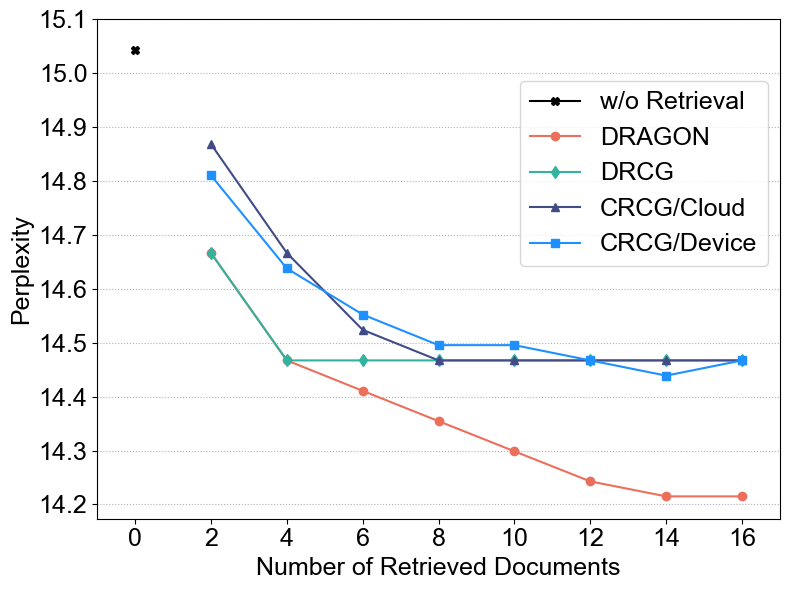

In [ ]:
metric = 'perplexity'
methods = list(result_data_wikitext2['n_docs=16'].keys())
colors = ['#EC6F5C', '#33B39F', '#414C87', '#1F90FF']
marker = ['o', 'd', '^', 's']
n_docs_list = list(range(2, 17, 2))
font = plt_utils.Font("arial", size=18)
plt.figure(figsize=(8, 6), dpi=100)
# plt.hlines(result_data_wikitext2['n_docs=0']['W/O Retrieval'][metric], 0, len(n_docs_list) - 1, 
#     label='w/o Retrieval', color='black', linestyle='--')
plt.plot(
    [result_data_wikitext2['n_docs=0']['W/O Retrieval'][metric]], 
    label='w/o Retrieval', color='black', marker='X'
)
for i, method in enumerate(methods):
    data = [result_data_wikitext2[f'{n_docs=}'][method][metric] for n_docs in n_docs_list]
    plt.plot(n_docs_list, data, label=method, marker=marker[i], color=colors[i % len(colors)])
plt.xlim(-1, n_docs_list[-1] + 1)
plt.xticks(fontproperties=font)
plt.yticks(np.arange(14.2, 15.2, 0.1), fontproperties=font)
plt.xlabel('Number of Retrieved Documents', fontproperties=font)
plt.ylabel("Perplexity", fontproperties=font)
plt.grid(axis='y', linestyle=':')
plt.tight_layout()
plt.legend(prop=font, loc='upper right', bbox_to_anchor=(1, 0.9))
plt.show()